# Speech Emotion Recognition

ID - Name

6123 - Rwan Sobhy Hussein



## Problem Statement

Speech is the most natural way of expressing ourselves as humans. It is only natural then to extend this communication medium to computer applications. We define speech emotion recognition (SER) systems as a collection of methodologies that process and classify speech signals to detect the embedded emotions. Below we will show the needed steps to achieve the goal of the assignment.

**Importing Libraries**

In [1]:
import IPython
import librosa
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from pathlib import Path
from PIL import Image
import random
import seaborn as sns
import scipy.io

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, MaxPooling1D, Flatten, BatchNormalization
from keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import LSTM
from keras_self_attention import SeqSelfAttention

%matplotlib inline
%load_ext autotime

time: 0 ns (started: 2023-05-28 11:36:10 +03:00)


**Utility Functions**

In [52]:
def find_min_list_len(list_of_lists):
    return np.min([len(i) for i in list_of_lists])

time: 0 ns (started: 2023-05-28 11:57:47 +03:00)


In [53]:
def find_max_list_len(list_of_lists):
    return np.max([len(i) for i in list_of_lists])

time: 0 ns (started: 2023-05-28 11:57:47 +03:00)


In [4]:
def return_random_audio_sample(df, label):
    return df.query(f"label == {label}").sample(n=1).index[0]

time: 0 ns (started: 2023-05-28 11:36:10 +03:00)


## 1. Download the Dataset and Understand the Format (10 Points)

a. We will use CREMA dataset that is available at the following link:

https://www.kaggle.com/dmitrybabko/speech-emotion-recognition-en


b. Write your own function that loads an audio and listen to each of the classes you have and plot the waveform of the audio.

In [5]:
crema_path = Path('data/Crema')
X = list(crema_path.glob(r'**/*.wav'))
y = [file.split('_')[2] for file in os.listdir(crema_path)]

time: 610 ms (started: 2023-05-28 11:36:10 +03:00)


In [6]:
df = pd.DataFrame({'path': X, 'label': y})
df

,path,label
0,data\Crema\1001_DFA_ANG_XX.wav,ANG
1,data\Crema\1001_DFA_DIS_XX.wav,DIS
2,data\Crema\1001_DFA_FEA_XX.wav,FEA
3,data\Crema\1001_DFA_HAP_XX.wav,HAP
4,data\Crema\1001_DFA_NEU_XX.wav,NEU
...,...,...
7437,data\Crema\1091_WSI_DIS_XX.wav,DIS
7438,data\Crema\1091_WSI_FEA_XX.wav,FEA
7439,data\Crema\1091_WSI_HAP_XX.wav,HAP
7440,data\Crema\1091_WSI_NEU_XX.wav,NEU


time: 31 ms (started: 2023-05-28 11:36:11 +03:00)


**Dataset Summary**

CREMA-D is a data set of 7,442 original clips from 91 actors. These clips were from 48 male and 43 female actors between the ages of 20 and 74 coming from a variety of races and ethnicities (African America, Asian, Caucasian, Hispanic, and Unspecified).

Actors spoke from a selection of 12 sentences. The sentences were presented using one of six different emotions (Anger, Disgust, Fear, Happy, Neutral and Sad) and four different emotion levels (Low, Medium, High and Unspecified).

Participants rated the emotion and emotion levels based on the combined audiovisual presentation, the video alone, and the audio alone. Due to the large number of ratings needed, this effort was crowd-sourced and a total of 2443 participants each rated 90 unique clips, 30 audio, 30 visual, and 30 audio-visual. 95% of the clips have more than 7 ratings.

In [7]:
set(y)

{'ANG', 'DIS', 'FEA', 'HAP', 'NEU', 'SAD'}

time: 0 ns (started: 2023-05-28 11:36:11 +03:00)


These correspond to the emotions:

- ANG: Anger 😡<br/>
- DIS: Disgust 🤢<br/>
- FEA: Fear 😱<br/>
- HAP: Happiness 😀<br/>
- NEU: Neutral 😐<br/>
- SAD: Sadness 😭

In [8]:
df['label'].value_counts()

ANG    1271
DIS    1271
FEA    1271
HAP    1271
SAD    1271
NEU    1087
Name: label, dtype: int64

time: 0 ns (started: 2023-05-28 11:36:11 +03:00)


**Sample for Anger**

In [9]:
IPython.display.Audio(df['path'][0])

time: 219 ms (started: 2023-05-28 11:36:11 +03:00)


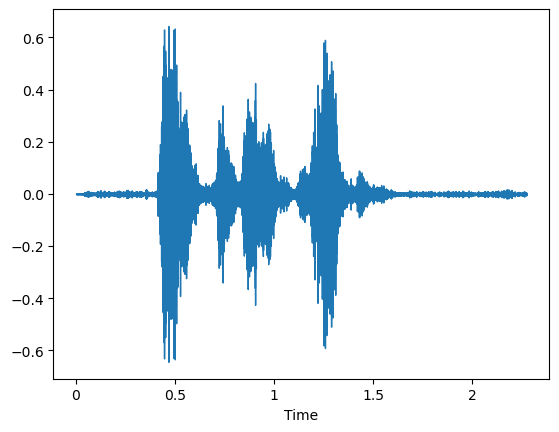

time: 3.08 s (started: 2023-05-28 11:36:11 +03:00)


In [10]:
anger_sample = librosa.load(df['path'][0])[0]
librosa.display.waveshow(anger_sample)

**Sample for Disgust**

In [11]:
IPython.display.Audio(df['path'][1])

time: 110 ms (started: 2023-05-28 11:36:14 +03:00)


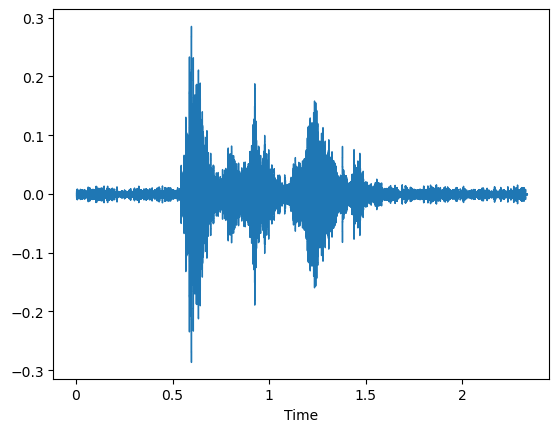

time: 391 ms (started: 2023-05-28 11:36:14 +03:00)


In [12]:
disgust_sample = librosa.load(df['path'][1])[0]
librosa.display.waveshow(disgust_sample)

**Sample for Fear**

In [13]:
IPython.display.Audio(df['path'][2])

time: 15 ms (started: 2023-05-28 11:36:15 +03:00)


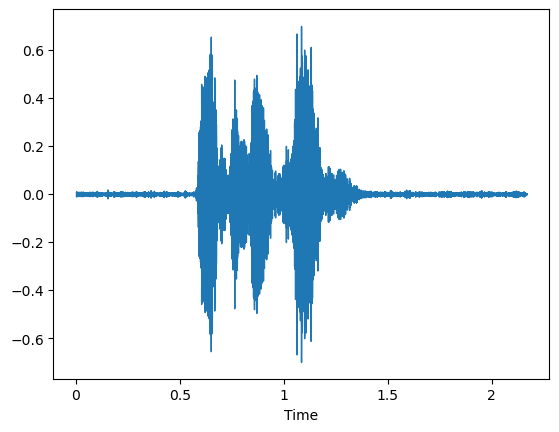

time: 344 ms (started: 2023-05-28 11:36:15 +03:00)


In [14]:
fear_sample = librosa.load(df['path'][2])[0]
librosa.display.waveshow(fear_sample)

**Sample for Happiness**

In [15]:
IPython.display.Audio(df['path'][3])

time: 94 ms (started: 2023-05-28 11:36:15 +03:00)


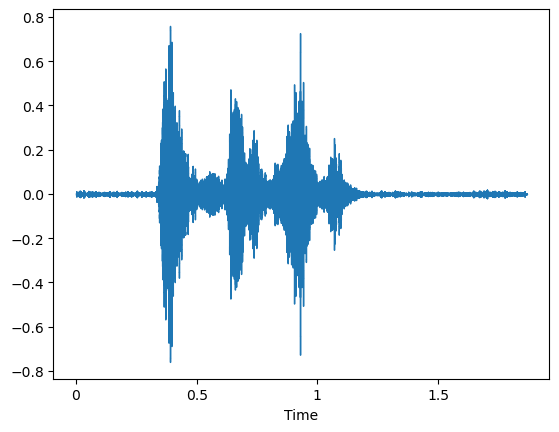

time: 421 ms (started: 2023-05-28 11:36:15 +03:00)


In [16]:
happiness_sample = librosa.load(df['path'][3])[0]
librosa.display.waveshow(happiness_sample)

**Sample for Neutral**

In [17]:
IPython.display.Audio(df['path'][4])

time: 109 ms (started: 2023-05-28 11:36:16 +03:00)


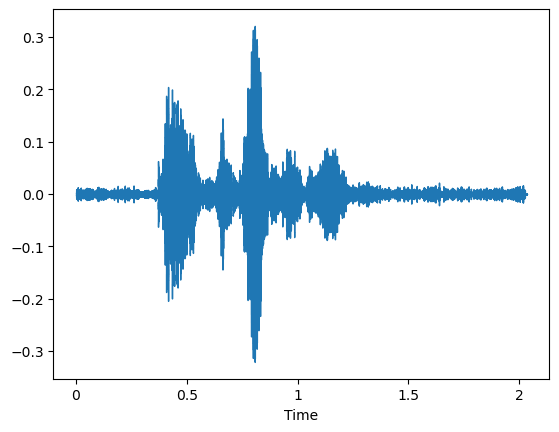

time: 359 ms (started: 2023-05-28 11:36:16 +03:00)


In [18]:
neutral_sample = librosa.load(df['path'][4])[0]
librosa.display.waveshow(neutral_sample)

**Sample for Sadness**

In [19]:
IPython.display.Audio(df['path'][5])

time: 78 ms (started: 2023-05-28 11:36:16 +03:00)


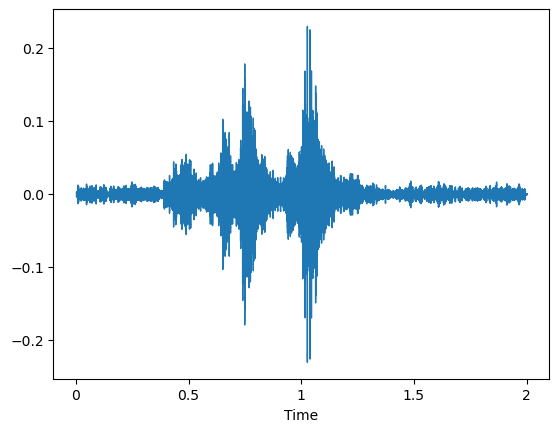

time: 329 ms (started: 2023-05-28 11:36:16 +03:00)


In [20]:
sadness_sample = librosa.load(df['path'][5])[0]
librosa.display.waveshow(sadness_sample)

### Preparing Dataset

**Loading Audio into DataFrame**

In [21]:
X = []
audio_sampling=[]
length=[]
audio_arrays=[]

for i in df['path']:
    x, sr = librosa.load(i, sr=44100)
    X.append(x)
    audio_sampling.append(sr)
    length.append(len(x))
    audio_arrays.append(x)
    
X = np.array(X, dtype='object')

time: 1min 24s (started: 2023-05-28 11:36:16 +03:00)


**Transforming Labels**

In [22]:
le = LabelEncoder()
y = utils.to_categorical(le.fit_transform(y))
y

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

time: 15 ms (started: 2023-05-28 11:37:41 +03:00)


In [23]:
le_name_mapping = dict(zip(le.classes_, utils.to_categorical(le.transform(le.classes_))))
le_name_mapping

{'ANG': array([1., 0., 0., 0., 0., 0.], dtype=float32),
 'DIS': array([0., 1., 0., 0., 0., 0.], dtype=float32),
 'FEA': array([0., 0., 1., 0., 0., 0.], dtype=float32),
 'HAP': array([0., 0., 0., 1., 0., 0.], dtype=float32),
 'NEU': array([0., 0., 0., 0., 1., 0.], dtype=float32),
 'SAD': array([0., 0., 0., 0., 0., 1.], dtype=float32)}

time: 0 ns (started: 2023-05-28 11:37:41 +03:00)


## 2. Create the Feature Space (30 Points)
We will create two feature spaces from the audio.

a. You can work on time domain, or you can work in frequency domain. There are multiple of features that can help improving the model:
>i. Zero crossing rate: The rate of sign-changes of the signal during the duration of a particular frame.
<br/>ii. Energy: The sum of squares of the signal values, normalized by the respective frame length.

b. Convert the audio waveform to mel spectrogram and use this as the
feature space.

**Splitting into training, validation and test sets**

In [24]:
_, _, _, _, indices_train_val, indices_test = train_test_split(X, y, np.arange(len(X)), test_size=0.3, random_state=42, stratify=y)
_, _, _, _, indices_train, indices_val = train_test_split(X[indices_train_val], y[indices_train_val], indices_train_val, test_size=0.05, random_state=42, stratify=y[indices_train_val])

time: 93 ms (started: 2023-05-28 11:37:41 +03:00)


In [25]:
len(indices_train)

4948

time: 16 ms (started: 2023-05-28 11:37:41 +03:00)


In [26]:
len(indices_val)

261

time: 15 ms (started: 2023-05-28 11:37:41 +03:00)


In [27]:
len(indices_test)

2233

time: 0 ns (started: 2023-05-28 11:37:42 +03:00)


**Split on Audio Data**

In [28]:
X_train = X[indices_train]
X_val = X[indices_val]
X_test = X[indices_test]

time: 0 ns (started: 2023-05-28 11:37:42 +03:00)


**Split on Label Data**

In [29]:
y_train = y[indices_train]
y_val = y[indices_val]
y_test = y[indices_test]

time: 0 ns (started: 2023-05-28 11:37:42 +03:00)


### Data Augmentation

In [30]:
def awgn(data):
    noise_amp = 0.055 * np.random.uniform() * np.amax(data)
    data += noise_amp * np.random.normal(size=data.shape[0])
    return data

time: 0 ns (started: 2023-05-28 11:37:42 +03:00)


In [31]:
def pitch(data, sr=44100, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sr, n_steps=1/pitch_factor)

time: 0 ns (started: 2023-05-28 11:37:42 +03:00)


In [32]:
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)

time: 0 ns (started: 2023-05-28 11:37:42 +03:00)


In [33]:
def time_shift(data, sr=44100, shift_limit=1):
    shift_amt = int(random.random() * shift_limit * len(data))
    return np.roll(data, shift_amt)

time: 0 ns (started: 2023-05-28 11:37:42 +03:00)


In [34]:
def data_augment(X, y, aug_techniques=(awgn, pitch, time_shift)):
    awgn, pitch, time_shift = aug_techniques
    X_aug = []
    y_aug = []
    
    for i in range(len(X)):
        # Adding Original data
        X_aug.append(X[i])
        y_aug.append(y[i])
        
        # Adding AWGN and Time Shift
        X_aug.append(awgn(time_shift(X[i])))
        y_aug.append(y[i])
        
        # Applying Pitch and Time Shift
        X_aug.append(pitch(time_shift(X[i])))
        y_aug.append(y[i])
        
    
    X_aug = np.array(X_aug, dtype='object')
    y_aug = np.array(y_aug)
    
    return X_aug, y_aug

time: 0 ns (started: 2023-05-28 11:37:42 +03:00)


In [35]:
X_aug_train, y_aug_train = data_augment(X_train, y_train)

time: 8min 26s (started: 2023-05-28 11:37:42 +03:00)


In [36]:
X_aug_train.shape

(14844,)

time: 16 ms (started: 2023-05-28 11:46:09 +03:00)


In [37]:
y_aug_train.shape

(14844, 6)

time: 0 ns (started: 2023-05-28 11:46:09 +03:00)


### Time Domain

**Feature Extraction**

In [66]:
def extract_fs1(X):
    result = []
    for i, sample in enumerate(X):
        zcr = list(librosa.feature.zero_crossing_rate(y=sample.astype(float))[0])
        rmse=list(librosa.feature.rms(y=sample.astype(float))[0])
        zcr += rmse
        result.append(zcr)
    return np.array(result, dtype='object')

time: 0 ns (started: 2023-05-28 12:07:44 +03:00)


_Without Augmentation_

In [67]:
X_fs1_train = extract_fs1(X_train)

time: 1min 17s (started: 2023-05-28 12:07:45 +03:00)


In [68]:
X_fs1_val = extract_fs1(X_val)

time: 4.05 s (started: 2023-05-28 12:09:02 +03:00)


In [69]:
X_fs1_test = extract_fs1(X_test)

time: 37.7 s (started: 2023-05-28 12:09:06 +03:00)


_With Augmentation_

In [70]:
X_aug_fs1_train = extract_fs1(X_aug_train)

time: 4min 1s (started: 2023-05-28 12:09:44 +03:00)


**Padding Feature Space**

In [71]:
def pad_dataset(X, m):
    X_padded = []
    for i, sample in enumerate(X):
        audio_length = len(sample)
        if (audio_length <= m):
            # Length of padding to add at the beginning and end of the signal
            pad_begin_len = random.randint(0, m - audio_length)
            pad_end_len = m - audio_length - pad_begin_len
            X_padded.append(np.pad(sample, (pad_begin_len, pad_end_len), 'constant'))
    
    return np.array(X_padded)

time: 15 ms (started: 2023-05-28 12:13:46 +03:00)


In [72]:
max_pad = max(find_max_list_len(X_fs1_train), find_max_list_len(X_fs1_val), find_max_list_len(X_fs1_test))
max_pad

864

time: 62 ms (started: 2023-05-28 12:13:46 +03:00)


_Without Augmentation_

In [98]:
X_fs1_train = pad_dataset(X_fs1_train, max_pad)
X_fs1_train.shape

(4948, 864)

time: 437 ms (started: 2023-05-28 12:39:08 +03:00)


In [99]:
X_fs1_val = pad_dataset(X_fs1_val, max_pad)
X_fs1_val.shape

(261, 864)

time: 31 ms (started: 2023-05-28 12:39:08 +03:00)


In [100]:
X_fs1_test = pad_dataset(X_fs1_test, max_pad)
X_fs1_test.shape

(2233, 864)

time: 172 ms (started: 2023-05-28 12:39:09 +03:00)


_With Augmentation_

In [101]:
X_aug_fs1_train = pad_dataset(X_aug_fs1_train, max_pad)
X_aug_fs1_train.shape

(14844, 864)

time: 1.48 s (started: 2023-05-28 12:39:10 +03:00)


### Mel Spectrogram

In [77]:
def mel_spectrogram(X, sr=44100, spec_shape=(128, 128)):
    X_mel = []
    for data in X:
        sgram = librosa.stft(data)
        sgram_mag, _ = librosa.magphase(sgram)
        mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sr)
        mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
        
        img = Image.fromarray(mel_sgram)
        img = np.asarray(img.resize(spec_shape, resample=Image.LANCZOS))
        
        X_mel.append(img)
    
    return np.array(X_mel)

time: 0 ns (started: 2023-05-28 12:16:08 +03:00)


_Without Augmentation_

In [78]:
X_mel_train = mel_spectrogram(X_train)

time: 2min 58s (started: 2023-05-28 12:16:10 +03:00)


In [79]:
X_mel_val = mel_spectrogram(X_val)

time: 7.86 s (started: 2023-05-28 12:19:09 +03:00)


In [80]:
X_mel_test = mel_spectrogram(X_test)

time: 1min 10s (started: 2023-05-28 12:19:17 +03:00)


_With Augmentation_

In [81]:
X_aug_mel_train = mel_spectrogram(X_aug_train)

time: 13min 53s (started: 2023-05-28 12:20:27 +03:00)


## 3. Building the Model (40 Points)

a. Split the data into 70% training and validation and 30% testing.

b. Use 5% of the training and validation data for validation.

c. CNN Model:
Build a CNN architecture of your own. For the time domain or frequency domain feature space, the feature space will be 1 dimensional, therefore in the architecture we will be using 1D convolutions. While in melspectogram feature space, the audio is represented as an image, therefore we will be using 2D convolutions. N.B. Do not use the built-in models, but you can implement them from scratch.

Don’t forget to set seed 42 and stratify to true!!

### Time Domain

_Without Augmentation (With SGD optimizer)_

In [103]:
input_shape = (X_fs1_train.shape[1], 1)

model5 = Sequential()

# LFLB1
model5.add(Conv1D(filters=64, kernel_size=(3), strides=1, padding='same', data_format='channels_last', input_shape=input_shape))
model5.add(BatchNormalization())
model5.add(Activation('elu'))
model5.add(MaxPooling1D(pool_size=4, strides=4))

# LFLB2
model5.add(Conv1D(filters=64, kernel_size=3, strides=1, padding='same'))
model5.add(BatchNormalization())
model5.add(Activation('elu'))
model5.add(MaxPooling1D(pool_size=4, strides=4))

# LFLB3
model5.add(Conv1D(filters=128, kernel_size=3, strides=1, padding='same'))
model5.add(BatchNormalization())
model5.add(Activation('elu'))
model5.add(MaxPooling1D(pool_size=4, strides=4))

# LFLB4
model5.add(Conv1D(filters=128, kernel_size=3, strides=1, padding='same'))
model5.add(BatchNormalization())
model5.add(Activation('elu'))
model5.add(MaxPooling1D(pool_size=4, strides=4))

# LSTM
model5.add(LSTM(units=64,return_sequences=True))
model5.add(SeqSelfAttention(attention_activation='tanh'))
model5.add(LSTM(units=64,return_sequences=False))

# FC
model5.add(Dense(units=6, activation='softmax'))    

time: 797 ms (started: 2023-05-28 12:39:32 +03:00)


In [104]:
# Model compilation
model5.compile(optimizer=optimizers.SGD(learning_rate=0.0001, decay=1e-6, momentum=0.9, nesterov=True), loss='categorical_crossentropy', metrics=['accuracy'])
model5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 864, 64)           256       
                                                                 
 batch_normalization_16 (Bat  (None, 864, 64)          256       
 chNormalization)                                                
                                                                 
 activation_16 (Activation)  (None, 864, 64)           0         
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 216, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_19 (Conv1D)          (None, 216, 64)           12352     
                                                                 
 batch_normalization_17 (Bat  (None, 216, 64)         

In [105]:
history5 = model5.fit(X_fs1_train,
                      y_train,
                      batch_size=32,
                      epochs=200,
                      validation_data=(X_fs1_val, y_val),
                      callbacks=[
                          EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1),
                          ModelCheckpoint('model_time_without_aug_sgd.h5', monitor='val_loss', save_best_only=True, verbose=1)
                      ]
                     )

Epoch 1/200
155/155 [==============================] - ETA: 0s - loss: 1.7921 - accuracy: 0.1714
Epoch 1: val_loss improved from inf to 1.79233, saving model to model_time_without_aug_sgd.h5
155/155 [==============================] - 25s 127ms/step - loss: 1.7921 - accuracy: 0.1714 - val_loss: 1.7923 - val_accuracy: 0.1609
Epoch 2/200
155/155 [==============================] - ETA: 0s - loss: 1.7871 - accuracy: 0.1776
Epoch 2: val_loss did not improve from 1.79233
155/155 [==============================] - 18s 114ms/step - loss: 1.7871 - accuracy: 0.1776 - val_loss: 1.7935 - val_accuracy: 0.1686
Epoch 3/200
155/155 [==============================] - ETA: 0s - loss: 1.7823 - accuracy: 0.2197
Epoch 3: val_loss did not improve from 1.79233
155/155 [==============================] - 20s 126ms/step - loss: 1.7823 - accuracy: 0.2197 - val_loss: 1.7934 - val_accuracy: 0.1648
Epoch 4/200
155/155 [==============================] - ETA: 0s - loss: 1.7778 - accuracy: 0.2579
Epoch 4: val_loss impr

155/155 [==============================] - ETA: 0s - loss: 1.6918 - accuracy: 0.3052
Epoch 26: val_loss improved from 1.70184 to 1.69862, saving model to model_time_without_aug_sgd.h5
155/155 [==============================] - 19s 123ms/step - loss: 1.6918 - accuracy: 0.3052 - val_loss: 1.6986 - val_accuracy: 0.2835
Epoch 27/200
155/155 [==============================] - ETA: 0s - loss: 1.6890 - accuracy: 0.3036
Epoch 27: val_loss improved from 1.69862 to 1.69534, saving model to model_time_without_aug_sgd.h5
155/155 [==============================] - 18s 114ms/step - loss: 1.6890 - accuracy: 0.3036 - val_loss: 1.6953 - val_accuracy: 0.2874
Epoch 28/200
155/155 [==============================] - ETA: 0s - loss: 1.6847 - accuracy: 0.3090
Epoch 28: val_loss improved from 1.69534 to 1.69208, saving model to model_time_without_aug_sgd.h5
155/155 [==============================] - 18s 118ms/step - loss: 1.6847 - accuracy: 0.3090 - val_loss: 1.6921 - val_accuracy: 0.2874
Epoch 29/200
155/155

Epoch 51/200
155/155 [==============================] - ETA: 0s - loss: 1.6092 - accuracy: 0.3312
Epoch 51: val_loss improved from 1.62187 to 1.61895, saving model to model_time_without_aug_sgd.h5
155/155 [==============================] - 17s 113ms/step - loss: 1.6092 - accuracy: 0.3312 - val_loss: 1.6189 - val_accuracy: 0.3218
Epoch 52/200
155/155 [==============================] - ETA: 0s - loss: 1.6050 - accuracy: 0.3347
Epoch 52: val_loss improved from 1.61895 to 1.61561, saving model to model_time_without_aug_sgd.h5
155/155 [==============================] - 18s 118ms/step - loss: 1.6050 - accuracy: 0.3347 - val_loss: 1.6156 - val_accuracy: 0.3218
Epoch 53/200
155/155 [==============================] - ETA: 0s - loss: 1.6016 - accuracy: 0.3365
Epoch 53: val_loss improved from 1.61561 to 1.61139, saving model to model_time_without_aug_sgd.h5
155/155 [==============================] - 18s 116ms/step - loss: 1.6016 - accuracy: 0.3365 - val_loss: 1.6114 - val_accuracy: 0.3257
Epoch 5

155/155 [==============================] - ETA: 0s - loss: 1.5317 - accuracy: 0.3690
Epoch 76: val_loss improved from 1.55086 to 1.54928, saving model to model_time_without_aug_sgd.h5
155/155 [==============================] - 18s 116ms/step - loss: 1.5317 - accuracy: 0.3690 - val_loss: 1.5493 - val_accuracy: 0.3257
Epoch 77/200
155/155 [==============================] - ETA: 0s - loss: 1.5281 - accuracy: 0.3775
Epoch 77: val_loss improved from 1.54928 to 1.54504, saving model to model_time_without_aug_sgd.h5
155/155 [==============================] - 18s 114ms/step - loss: 1.5281 - accuracy: 0.3775 - val_loss: 1.5450 - val_accuracy: 0.3410
Epoch 78/200
155/155 [==============================] - ETA: 0s - loss: 1.5240 - accuracy: 0.3737
Epoch 78: val_loss improved from 1.54504 to 1.54439, saving model to model_time_without_aug_sgd.h5
155/155 [==============================] - 19s 124ms/step - loss: 1.5240 - accuracy: 0.3737 - val_loss: 1.5444 - val_accuracy: 0.3563
Epoch 79/200
155/155

Epoch 102/200
155/155 [==============================] - ETA: 0s - loss: 1.4604 - accuracy: 0.4028
Epoch 102: val_loss did not improve from 1.50030
155/155 [==============================] - 18s 118ms/step - loss: 1.4604 - accuracy: 0.4028 - val_loss: 1.5325 - val_accuracy: 0.3180
Epoch 103/200
155/155 [==============================] - ETA: 0s - loss: 1.4582 - accuracy: 0.4080
Epoch 103: val_loss did not improve from 1.50030
155/155 [==============================] - 19s 120ms/step - loss: 1.4582 - accuracy: 0.4080 - val_loss: 1.5295 - val_accuracy: 0.3295
Epoch 104/200
155/155 [==============================] - ETA: 0s - loss: 1.4560 - accuracy: 0.4082
Epoch 104: val_loss did not improve from 1.50030
155/155 [==============================] - 18s 114ms/step - loss: 1.4560 - accuracy: 0.4082 - val_loss: 1.5048 - val_accuracy: 0.3640
Epoch 105/200
155/155 [==============================] - ETA: 0s - loss: 1.4505 - accuracy: 0.4080
Epoch 105: val_loss improved from 1.50030 to 1.49954, s

Epoch 130/200
155/155 [==============================] - ETA: 0s - loss: 1.3890 - accuracy: 0.4555
Epoch 130: val_loss did not improve from 1.48297
155/155 [==============================] - 19s 120ms/step - loss: 1.3890 - accuracy: 0.4555 - val_loss: 1.4969 - val_accuracy: 0.3448
Epoch 131/200
155/155 [==============================] - ETA: 0s - loss: 1.3820 - accuracy: 0.4559
Epoch 131: val_loss improved from 1.48297 to 1.48290, saving model to model_time_without_aug_sgd.h5
155/155 [==============================] - 18s 119ms/step - loss: 1.3820 - accuracy: 0.4559 - val_loss: 1.4829 - val_accuracy: 0.3640
Epoch 132/200
155/155 [==============================] - ETA: 0s - loss: 1.3801 - accuracy: 0.4539
Epoch 132: val_loss did not improve from 1.48290
155/155 [==============================] - 18s 118ms/step - loss: 1.3801 - accuracy: 0.4539 - val_loss: 1.4918 - val_accuracy: 0.3448
Epoch 133/200
155/155 [==============================] - ETA: 0s - loss: 1.3762 - accuracy: 0.4555
Epoc

In [106]:
test_loss5, test_acc5 = model5.evaluate(X_fs1_test, y_test)

70/70 [==============================] - 3s 39ms/step - loss: 1.4798 - accuracy: 0.4089
time: 2.92 s (started: 2023-05-28 13:25:30 +03:00)


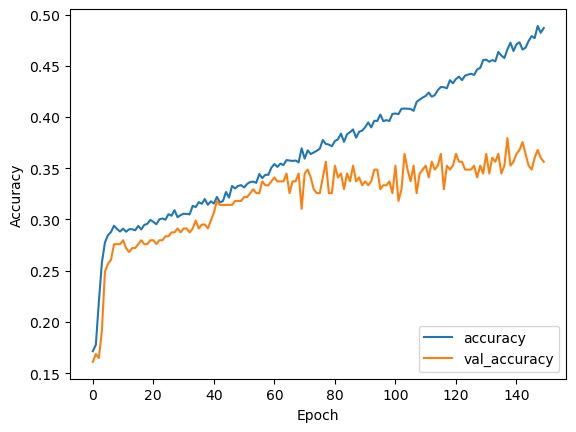

time: 437 ms (started: 2023-05-28 13:25:33 +03:00)


In [107]:
plt.plot(history5.history['accuracy'], label='accuracy')
plt.plot(history5.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

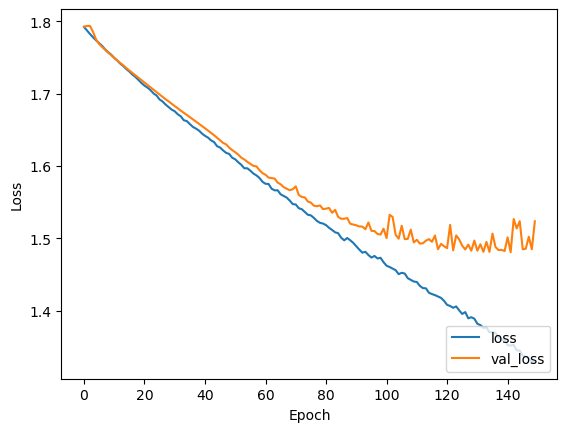

time: 187 ms (started: 2023-05-28 13:25:34 +03:00)


In [108]:
plt.plot(history5.history['loss'], label='loss')
plt.plot(history5.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

_Without Augmentation (With Adam optimizer)_

In [121]:
input_shape = (X_fs1_train.shape[1], 1)

model = Sequential()

# LFLB1
model.add(Conv1D(filters=64, kernel_size=(3), strides=1, padding='same', data_format='channels_last', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling1D(pool_size=4, strides=4))

# LFLB2
model.add(Conv1D(filters=64, kernel_size=3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling1D(pool_size=4, strides=4))

# LFLB3
model.add(Conv1D(filters=128, kernel_size=3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling1D(pool_size=4, strides=4))

# LFLB4
model.add(Conv1D(filters=128, kernel_size=3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling1D(pool_size=4, strides=4))

# LSTM
model.add(LSTM(units=64,return_sequences=True))
model.add(SeqSelfAttention(attention_activation='tanh'))
model.add(LSTM(units=64,return_sequences=False))

# FC
model.add(Dense(units=6, activation='softmax'))    

time: 735 ms (started: 2023-05-28 13:39:10 +03:00)


In [122]:
# Model compilation
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_31 (Conv1D)          (None, 864, 64)           256       
                                                                 
 batch_normalization_28 (Bat  (None, 864, 64)          256       
 chNormalization)                                                
                                                                 
 activation_28 (Activation)  (None, 864, 64)           0         
                                                                 
 max_pooling1d_28 (MaxPoolin  (None, 216, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_32 (Conv1D)          (None, 216, 64)           12352     
                                                                 
 batch_normalization_29 (Bat  (None, 216, 64)        

In [123]:
history = model.fit(X_fs1_train,
                    y_train,
                    batch_size=16,
                    epochs=300,
                    validation_data=(X_fs1_val, y_val),
                    callbacks=[
                        EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1), 
                        ModelCheckpoint('model_time_without_aug_adam.h5', monitor='val_loss', save_best_only=True, verbose=1),
                        lrs
                    ]
                   )

Epoch 1/300
309/310 [============================>.] - ETA: 0s - loss: 1.6684 - accuracy: 0.3117
Epoch 1: val_loss improved from inf to 1.98097, saving model to model_time_without_aug_adam.h5
310/310 [==============================] - 29s 75ms/step - loss: 1.6681 - accuracy: 0.3118 - val_loss: 1.9810 - val_accuracy: 0.1686 - lr: 1.0000e-04
Epoch 2/300
309/310 [============================>.] - ETA: 0s - loss: 1.5010 - accuracy: 0.3896
Epoch 2: val_loss improved from 1.98097 to 1.93519, saving model to model_time_without_aug_adam.h5
310/310 [==============================] - 24s 78ms/step - loss: 1.5005 - accuracy: 0.3899 - val_loss: 1.9352 - val_accuracy: 0.2222 - lr: 1.0000e-04
Epoch 3/300
309/310 [============================>.] - ETA: 0s - loss: 1.4359 - accuracy: 0.4223
Epoch 3: val_loss improved from 1.93519 to 1.72360, saving model to model_time_without_aug_adam.h5
310/310 [==============================] - 24s 78ms/step - loss: 1.4357 - accuracy: 0.4224 - val_loss: 1.7236 - val_

In [124]:
test_loss, test_acc = model.evaluate(X_fs1_test, y_test)

70/70 [==============================] - 3s 36ms/step - loss: 1.3524 - accuracy: 0.4617
time: 2.58 s (started: 2023-05-28 13:47:10 +03:00)


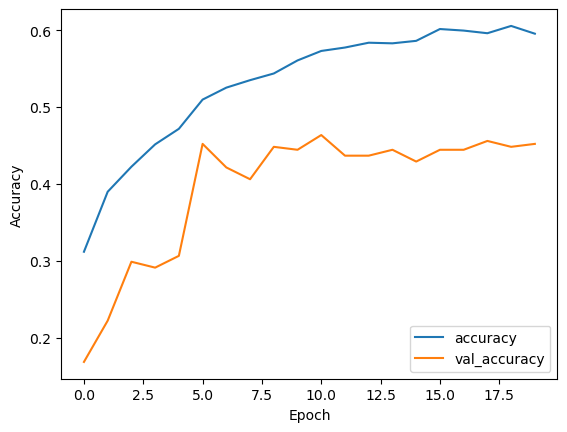

time: 172 ms (started: 2023-05-28 13:47:13 +03:00)


In [125]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

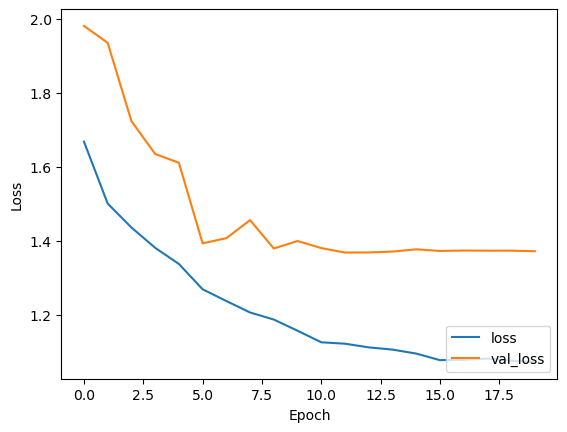

time: 187 ms (started: 2023-05-28 13:47:13 +03:00)


In [126]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

_With Augementation (with SGD optimizer)_

In [131]:
input_shape = (X_aug_fs1_train.shape[1], 1)

model6 = Sequential()

# LFLB1
model6.add(Conv1D(filters=64, kernel_size=(3), strides=1, padding='same', data_format='channels_last', input_shape=input_shape))
model6.add(BatchNormalization())
model6.add(Activation('elu'))
model6.add(MaxPooling1D(pool_size=4, strides=4))

# LFLB2
model6.add(Conv1D(filters=64, kernel_size=3, strides=1, padding='same'))
model6.add(BatchNormalization())
model6.add(Activation('elu'))
model6.add(MaxPooling1D(pool_size=4, strides=4))

# LFLB3
model6.add(Conv1D(filters=128, kernel_size=3, strides=1, padding='same'))
model6.add(BatchNormalization())
model6.add(Activation('elu'))
model6.add(MaxPooling1D(pool_size=4, strides=4))

# LFLB4
model6.add(Conv1D(filters=128, kernel_size=3, strides=1, padding='same'))
model6.add(BatchNormalization())
model6.add(Activation('elu'))
model6.add(MaxPooling1D(pool_size=4, strides=4))

# LSTM
model6.add(LSTM(units=64,return_sequences=True))
model6.add(SeqSelfAttention(attention_activation='tanh'))
model6.add(LSTM(units=64,return_sequences=False))

# FC
model6.add(Dense(units=6, activation='softmax'))    

time: 672 ms (started: 2023-05-28 13:53:14 +03:00)


In [132]:
# Model compilation
model6.compile(optimizer=optimizers.SGD(learning_rate=0.0003, decay=1e-6, momentum=0.9, nesterov=True), loss='categorical_crossentropy', metrics=['accuracy'])
model6.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_43 (Conv1D)          (None, 864, 64)           256       
                                                                 
 batch_normalization_40 (Bat  (None, 864, 64)          256       
 chNormalization)                                                
                                                                 
 activation_40 (Activation)  (None, 864, 64)           0         
                                                                 
 max_pooling1d_40 (MaxPoolin  (None, 216, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_44 (Conv1D)          (None, 216, 64)           12352     
                                                                 
 batch_normalization_41 (Bat  (None, 216, 64)        

In [133]:
history6 = model6.fit(X_aug_fs1_train,
                      y_aug_train,
                      batch_size=32,
                      epochs=200,
                      validation_data=(X_fs1_val, y_val),
                      callbacks=[
                          EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1),
                          ModelCheckpoint('model_time_with_aug_sgd.h5', monitor='val_loss', save_best_only=True, verbose=1),
                      ]
                     )

Epoch 1/200
464/464 [==============================] - ETA: 0s - loss: 1.7741 - accuracy: 0.2327
Epoch 1: val_loss improved from inf to 1.78597, saving model to model_time_with_aug_sgd.h5
464/464 [==============================] - 62s 123ms/step - loss: 1.7741 - accuracy: 0.2327 - val_loss: 1.7860 - val_accuracy: 0.1839 - lr: 3.0000e-04
Epoch 2/200
464/464 [==============================] - ETA: 0s - loss: 1.7561 - accuracy: 0.2668
Epoch 2: val_loss improved from 1.78597 to 1.75296, saving model to model_time_with_aug_sgd.h5
464/464 [==============================] - 56s 121ms/step - loss: 1.7561 - accuracy: 0.2668 - val_loss: 1.7530 - val_accuracy: 0.2452 - lr: 3.0000e-04
Epoch 3/200
464/464 [==============================] - ETA: 0s - loss: 1.7401 - accuracy: 0.2726
Epoch 3: val_loss improved from 1.75296 to 1.73853, saving model to model_time_with_aug_sgd.h5
464/464 [==============================] - 56s 122ms/step - loss: 1.7401 - accuracy: 0.2726 - val_loss: 1.7385 - val_accuracy:

KeyboardInterrupt: 

time: 20min 13s (started: 2023-05-28 13:53:22 +03:00)


In [176]:
test_loss6, test_acc6 = model6.evaluate(X_fs1_test, y_test)

70/70 [==============================] - 4s 51ms/step - loss: 1.6489 - accuracy: 0.3023
time: 3.84 s (started: 2023-05-28 18:16:34 +03:00)


In [ ]:
plt.plot(history6.history['accuracy'], label='accuracy')
plt.plot(history6.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
plt.plot(history6.history['loss'], label='loss')
plt.plot(history6.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

_With Augmentation (with Adam optimizer)_

In [141]:
input_shape = (X_aug_fs1_train.shape[1], 1)

model2 = Sequential()

# LFLB1
model2.add(Conv1D(filters=64, kernel_size=(3), strides=1, padding='same', data_format='channels_last', input_shape=input_shape))
model2.add(BatchNormalization())
model2.add(Activation('elu'))
model2.add(MaxPooling1D(pool_size=4, strides=4))

# LFLB2
model2.add(Conv1D(filters=64, kernel_size=3, strides=1, padding='same'))
model2.add(BatchNormalization())
model2.add(Activation('elu'))
model2.add(MaxPooling1D(pool_size=4, strides=4))

# LFLB3
model2.add(Conv1D(filters=128, kernel_size=3, strides=1, padding='same'))
model2.add(BatchNormalization())
model2.add(Activation('elu'))
model2.add(MaxPooling1D(pool_size=4, strides=4))

# LFLB4
model2.add(Conv1D(filters=128, kernel_size=3, strides=1, padding='same'))
model2.add(BatchNormalization())
model2.add(Activation('elu'))
model2.add(MaxPooling1D(pool_size=4, strides=4))

# LSTM
model2.add(LSTM(units=64, return_sequences=True))
model2.add(SeqSelfAttention(attention_activation='tanh'))
model2.add(LSTM(units=64, return_sequences=False))

# FC
model2.add(Dense(units=6, activation='softmax'))    

time: 703 ms (started: 2023-05-28 14:16:43 +03:00)


In [142]:
# Model compilation
model2.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_55 (Conv1D)          (None, 864, 64)           256       
                                                                 
 batch_normalization_52 (Bat  (None, 864, 64)          256       
 chNormalization)                                                
                                                                 
 activation_52 (Activation)  (None, 864, 64)           0         
                                                                 
 max_pooling1d_52 (MaxPoolin  (None, 216, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_56 (Conv1D)          (None, 216, 64)           12352     
                                                                 
 batch_normalization_53 (Bat  (None, 216, 64)        

In [143]:
history2 = model2.fit(
    X_aug_fs1_train,
    y_aug_train,
    batch_size=32,
    epochs=200,
    validation_data=(X_fs1_val, y_val),
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True),
        ModelCheckpoint('model_time_with_aug.h5', monitor='val_loss', save_best_only=True, verbose=1),
        lrs
    ]
)

Epoch 1/200
464/464 [==============================] - ETA: 0s - loss: 1.6559 - accuracy: 0.2970
Epoch 1: val_loss improved from inf to 1.82500, saving model to model_time_with_aug.h5
464/464 [==============================] - 68s 135ms/step - loss: 1.6559 - accuracy: 0.2970 - val_loss: 1.8250 - val_accuracy: 0.1954 - lr: 1.0000e-04
Epoch 2/200
464/464 [==============================] - ETA: 0s - loss: 1.5173 - accuracy: 0.3674
Epoch 2: val_loss improved from 1.82500 to 1.56180, saving model to model_time_with_aug.h5
464/464 [==============================] - 65s 140ms/step - loss: 1.5173 - accuracy: 0.3674 - val_loss: 1.5618 - val_accuracy: 0.3257 - lr: 1.0000e-04
Epoch 3/200
464/464 [==============================] - ETA: 0s - loss: 1.4642 - accuracy: 0.3985
Epoch 3: val_loss improved from 1.56180 to 1.49402, saving model to model_time_with_aug.h5
464/464 [==============================] - 63s 137ms/step - loss: 1.4642 - accuracy: 0.3985 - val_loss: 1.4940 - val_accuracy: 0.3410 - lr

In [144]:
test_loss2, test_acc2 = model2.evaluate(X_fs1_test, y_test)

70/70 [==============================] - 3s 42ms/step - loss: 1.3402 - accuracy: 0.4787
time: 3 s (started: 2023-05-28 14:41:48 +03:00)


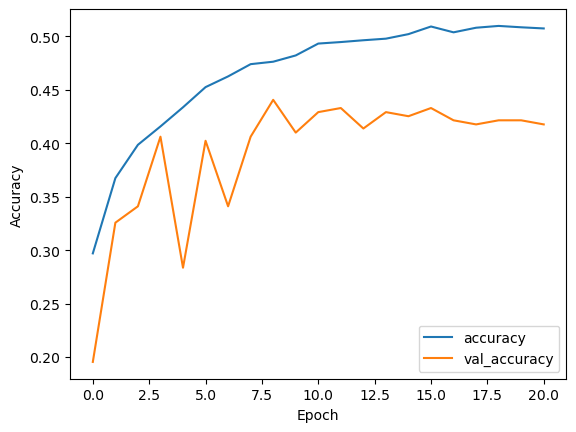

time: 219 ms (started: 2023-05-28 14:41:51 +03:00)


In [145]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

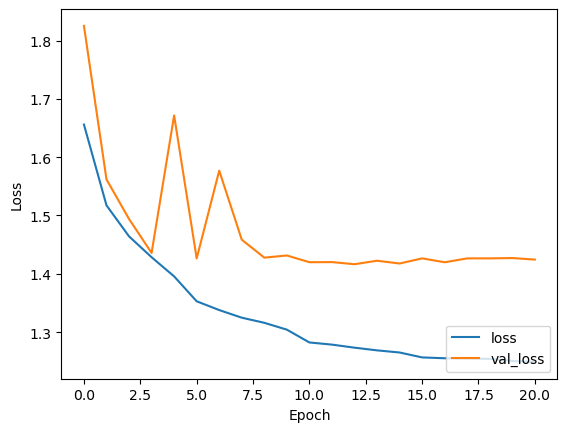

time: 156 ms (started: 2023-05-28 14:41:52 +03:00)


In [146]:
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

### Mel Spectrogram

**Callbacks**

In [120]:
def lr_scheduler(epoch, lr):
    if epoch % 5 == 0 and epoch > 0:
        lr /= 3
    return lr

lrs = LearningRateScheduler(lr_scheduler)
es = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

time: 0 ns (started: 2023-05-28 13:38:15 +03:00)


**Model Definition and Training**

**This is a modified implementation of:**

Zhaoa , J., Maoa, X., Chena, L. (2018). Speech emotion recognition using deep 1D & 2D CNN LSTM networks. Biomedical Signal Processing and Control, 47 (2019), 312–323.

In [147]:
input_shape=(128, 128, 1)

# Define the model architecture
model3 = tf.keras.Sequential()

# Add the layers
# LFLB1
model3.add(layers.Conv2D(64, (3, 3), strides=(1,1), padding='same', input_shape=input_shape))
model3.add(layers.BatchNormalization())
model3.add(layers.Activation('elu'))
model3.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# LFLB2
model3.add(layers.Conv2D(64, (3, 3), strides=(1,1), padding='same'))
model3.add(layers.BatchNormalization())
model3.add(layers.Activation('elu'))
model3.add(layers.MaxPooling2D(pool_size=(4,4), strides=(4,4)))

# LFLB3
model3.add(layers.Conv2D(128, (3, 3), strides=(1,1), padding='same'))
model3.add(layers.BatchNormalization())
model3.add(layers.Activation('elu'))
model3.add(layers.MaxPooling2D(pool_size=(4,4), strides=(4,4)))

# LFLB4
model3.add(layers.Conv2D(128, (3, 3), strides=(1,1), padding='same'))
model3.add(layers.BatchNormalization())
model3.add(layers.Activation('elu'))
model3.add(layers.MaxPooling2D(pool_size=(4,4), strides=(4,4)))

#LSTM
model3.add(layers.TimeDistributed(Flatten()))
model3.add(LSTM(units=64, return_sequences=True))
model3.add(SeqSelfAttention(attention_activation='tanh'))
model3.add(LSTM(units=64, return_sequences=False))

#FC
model3.add(Dense(units=6, activation='softmax'))

time: 704 ms (started: 2023-05-28 14:42:54 +03:00)


_Without Augmentation_

In [148]:
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model3.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      640       
                                                                 
 batch_normalization_56 (Bat  (None, 128, 128, 64)     256       
 chNormalization)                                                
                                                                 
 activation_56 (Activation)  (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 batch_normalization_57 (Bat  (None, 64, 64, 64)     

In [149]:
history3 = model3.fit(X_mel_train,
                      y_train,
                      batch_size=16,
                      epochs=20,
                      validation_data=(X_mel_val, y_val),
                      callbacks=[
                          EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True),
                          ModelCheckpoint('model_mel_without_aug.h5', monitor='val_loss', save_best_only=True, verbose=1),
                          LearningRateScheduler(lr_scheduler)
                      ]
)

Epoch 1/20
310/310 [==============================] - ETA: 0s - loss: 1.6157 - accuracy: 0.3504
Epoch 1: val_loss improved from inf to 1.48717, saving model to model_mel_without_aug.h5
310/310 [==============================] - 116s 358ms/step - loss: 1.6157 - accuracy: 0.3504 - val_loss: 1.4872 - val_accuracy: 0.4023 - lr: 1.0000e-04
Epoch 2/20
310/310 [==============================] - ETA: 0s - loss: 1.4031 - accuracy: 0.4456
Epoch 2: val_loss improved from 1.48717 to 1.35088, saving model to model_mel_without_aug.h5
310/310 [==============================] - 114s 366ms/step - loss: 1.4031 - accuracy: 0.4456 - val_loss: 1.3509 - val_accuracy: 0.4789 - lr: 1.0000e-04
Epoch 3/20
310/310 [==============================] - ETA: 0s - loss: 1.2609 - accuracy: 0.5220
Epoch 3: val_loss improved from 1.35088 to 1.26306, saving model to model_mel_without_aug.h5
310/310 [==============================] - 112s 360ms/step - loss: 1.2609 - accuracy: 0.5220 - val_loss: 1.2631 - val_accuracy: 0.513

In [150]:
test_loss3, test_acc3 = model3.evaluate(X_mel_test, y_test)

70/70 [==============================] - 16s 225ms/step - loss: 1.0592 - accuracy: 0.5916
time: 15.8 s (started: 2023-05-28 15:12:55 +03:00)


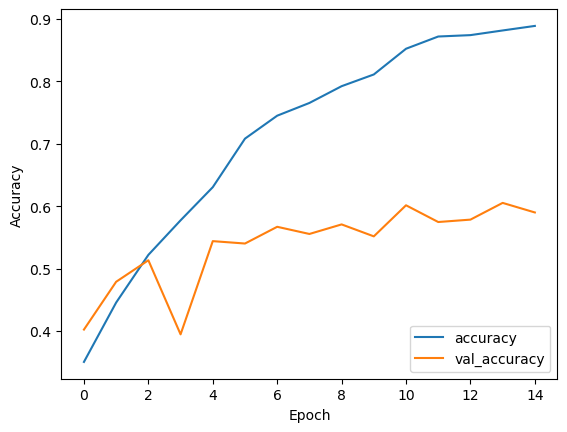

time: 218 ms (started: 2023-05-28 15:13:11 +03:00)


In [151]:
plt.plot(history3.history['accuracy'], label='accuracy')
plt.plot(history3.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

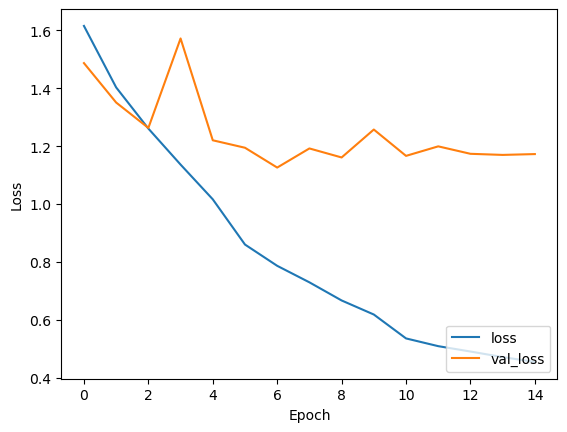

time: 204 ms (started: 2023-05-28 15:13:11 +03:00)


In [152]:
plt.plot(history3.history['loss'], label='loss')
plt.plot(history3.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

_With Augmentation_

In [153]:
# Define the model architecture
model4 = tf.keras.Sequential()

# Add the layers
# LFLB1
model4.add(layers.Conv2D(64, (3, 3), strides=(1,1), padding='same', input_shape=input_shape))
model4.add(layers.BatchNormalization())
model4.add(layers.Activation('elu'))
model4.add(layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# LFLB2
model4.add(layers.Conv2D(64, (3, 3), strides=(1,1), padding='same'))
model4.add(layers.BatchNormalization())
model4.add(layers.Activation('elu'))
model4.add(layers.MaxPooling2D(pool_size=(4,4), strides=(4,4)))

# LFLB3
model4.add(layers.Conv2D(128, (3, 3), strides=(1,1), padding='same'))
model4.add(layers.BatchNormalization())
model4.add(layers.Activation('elu'))
model4.add(layers.MaxPooling2D(pool_size=(4,4), strides=(4,4)))

# LFLB4
model4.add(layers.Conv2D(128, (3, 3), strides=(1,1), padding='same'))
model4.add(layers.BatchNormalization())
model4.add(layers.Activation('elu'))
model4.add(layers.MaxPooling2D(pool_size=(4,4), strides=(4,4)))

#LSTM
model4.add(layers.TimeDistributed(Flatten()))
model4.add(LSTM(units=64, return_sequences=True))
model4.add(SeqSelfAttention(attention_activation='tanh'))
model4.add(LSTM(units=64, return_sequences=False))

#FC
model4.add(Dense(units=6, activation='softmax'))

time: 718 ms (started: 2023-05-28 15:20:30 +03:00)


In [154]:
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model4.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      640       
                                                                 
 batch_normalization_60 (Bat  (None, 128, 128, 64)     256       
 chNormalization)                                                
                                                                 
 activation_60 (Activation)  (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 batch_normalization_61 (Bat  (None, 64, 64, 64)     

In [155]:
history4 = model4.fit(
    X_aug_mel_train,
    y_aug_train,
    batch_size=16,
    epochs=20,
    verbose=1,
    validation_data=(X_mel_val, y_val),
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True),
        ModelCheckpoint('model_mel_without_aug.h5', monitor='val_loss', save_best_only=True, verbose=1),
        LearningRateScheduler(lr_scheduler)
    ]
)

Epoch 1/20
928/928 [==============================] - ETA: 0s - loss: 1.5702 - accuracy: 0.3580
Epoch 1: val_loss improved from inf to 1.40833, saving model to model_mel_without_aug.h5
928/928 [==============================] - 343s 364ms/step - loss: 1.5702 - accuracy: 0.3580 - val_loss: 1.4083 - val_accuracy: 0.4444 - lr: 1.0000e-04
Epoch 2/20
928/928 [==============================] - ETA: 0s - loss: 1.3961 - accuracy: 0.4340
Epoch 2: val_loss improved from 1.40833 to 1.36646, saving model to model_mel_without_aug.h5
928/928 [==============================] - 326s 352ms/step - loss: 1.3961 - accuracy: 0.4340 - val_loss: 1.3665 - val_accuracy: 0.4598 - lr: 1.0000e-04
Epoch 3/20
928/928 [==============================] - ETA: 0s - loss: 1.2932 - accuracy: 0.4881
Epoch 3: val_loss improved from 1.36646 to 1.24811, saving model to model_mel_without_aug.h5
928/928 [==============================] - 324s 349ms/step - loss: 1.2932 - accuracy: 0.4881 - val_loss: 1.2481 - val_accuracy: 0.540

In [156]:
test_loss4, test_acc4 = model4.evaluate(X_mel_test, y_test)

70/70 [==============================] - 15s 214ms/step - loss: 1.0690 - accuracy: 0.6158
time: 15.3 s (started: 2023-05-28 17:13:48 +03:00)


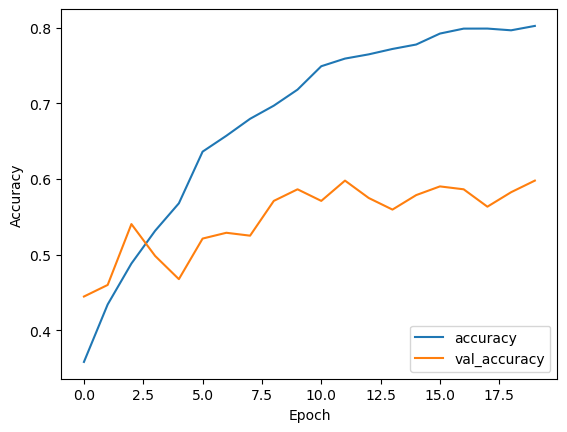

time: 360 ms (started: 2023-05-28 17:14:04 +03:00)


In [157]:
plt.plot(history4.history['accuracy'], label='accuracy')
plt.plot(history4.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

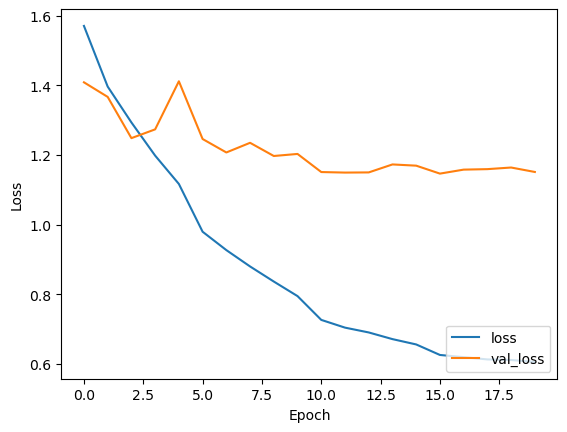

time: 188 ms (started: 2023-05-28 17:14:04 +03:00)


In [158]:
plt.plot(history4.history['loss'], label='loss')
plt.plot(history4.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

## 4. Big Picture (20 Points)

Compare between the performance of the learned models (Different features, different learning models) by realizing the following:

a. Compute the accuracy and F-Score for each model.

b. Plot the confusion matrices and find the most confusing classes.

In [159]:
def compare_performance(y_true, y_pred):
    y_true = np.argmax(y_true, axis=1)
    y_pred = np.argmax(y_pred, axis=1)
    
    matrix = confusion_matrix(y_true, y_pred)
    ax = sns.heatmap(matrix, annot=True, fmt="d", cmap='rocket_r', xticklabels=['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'], yticklabels=['Anger', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness'])
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    
    print(classification_report(y_true, y_pred))

time: 16 ms (started: 2023-05-28 17:14:04 +03:00)


### Time Domain

**_Without Augmentation_**

In [168]:
y_train_pred = model.predict(X_fs1_train_padded)
y_val_pred = model.predict(X_fs1_val_padded)
y_test_pred = model.predict(X_fs1_test_padded)

70/70 [==============================] - 3s 49ms/step
time: 13 s (started: 2023-05-28 17:18:09 +03:00)


**Training**

              precision    recall  f1-score   support

           0       0.66      0.64      0.65       845
           1       0.44      0.39      0.41       845
           2       0.38      0.27      0.31       845
           3       0.44      0.47      0.45       845
           4       0.43      0.43      0.43       723
           5       0.48      0.65      0.55       845

    accuracy                           0.48      4948
   macro avg       0.47      0.47      0.47      4948
weighted avg       0.47      0.48      0.47      4948



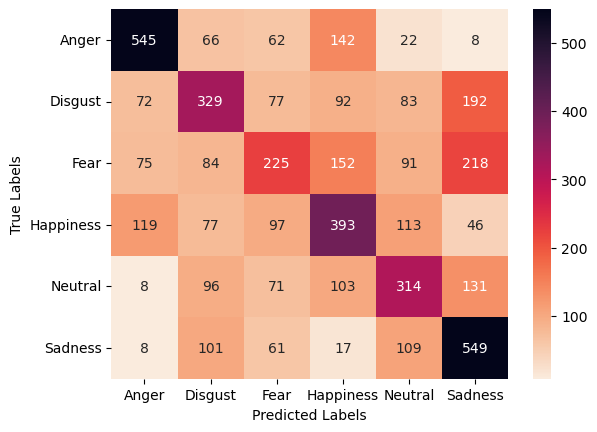

time: 281 ms (started: 2023-05-28 17:18:23 +03:00)


In [169]:
compare_performance(y_train, y_train_pred)

**Validation**

              precision    recall  f1-score   support

           0       0.57      0.64      0.60        45
           1       0.42      0.41      0.41        44
           2       0.30      0.22      0.26        45
           3       0.47      0.38      0.42        45
           4       0.35      0.37      0.36        38
           5       0.48      0.64      0.55        44

    accuracy                           0.44       261
   macro avg       0.43      0.44      0.43       261
weighted avg       0.43      0.44      0.44       261



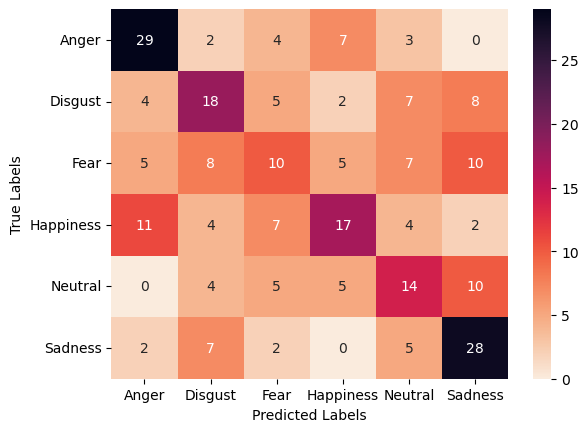

time: 266 ms (started: 2023-05-28 17:18:23 +03:00)


In [170]:
compare_performance(y_val, y_val_pred)

**Test**

              precision    recall  f1-score   support

           0       0.65      0.66      0.65       381
           1       0.47      0.39      0.43       382
           2       0.29      0.19      0.23       381
           3       0.42      0.46      0.44       381
           4       0.44      0.47      0.46       326
           5       0.48      0.64      0.55       382

    accuracy                           0.47      2233
   macro avg       0.46      0.47      0.46      2233
weighted avg       0.46      0.47      0.46      2233



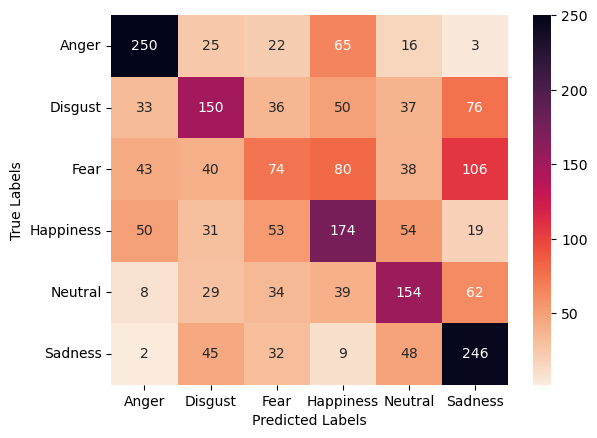

time: 250 ms (started: 2023-05-28 17:18:23 +03:00)


In [171]:
compare_performance(y_test, y_test_pred)

**_With Augmentation_**

In [172]:
y_aug_train_pred = model2.predict(X_aug_fs1_train_padded)
y_val_pred2 = model2.predict(X_fs1_val_padded)
y_test_pred2 = model2.predict(X_fs1_test_padded)

70/70 [==============================] - 3s 42ms/step
time: 24.5 s (started: 2023-05-28 17:18:37 +03:00)


**Training**

              precision    recall  f1-score   support

           0       0.61      0.69      0.65      2535
           1       0.39      0.35      0.37      2535
           2       0.33      0.18      0.23      2535
           3       0.42      0.40      0.41      2535
           4       0.39      0.42      0.41      2169
           5       0.46      0.65      0.54      2535

    accuracy                           0.45     14844
   macro avg       0.43      0.45      0.43     14844
weighted avg       0.44      0.45      0.44     14844



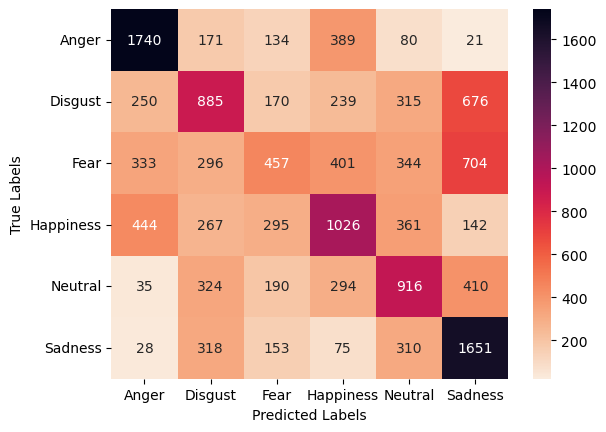

time: 344 ms (started: 2023-05-28 17:19:01 +03:00)


In [173]:
compare_performance(y_aug_train, y_aug_train_pred)

**Validation**

              precision    recall  f1-score   support

           0       0.50      0.64      0.56        45
           1       0.31      0.20      0.25        44
           2       0.24      0.13      0.17        45
           3       0.37      0.36      0.36        45
           4       0.43      0.47      0.45        38
           5       0.44      0.64      0.52        44

    accuracy                           0.41       261
   macro avg       0.38      0.41      0.39       261
weighted avg       0.38      0.41      0.38       261



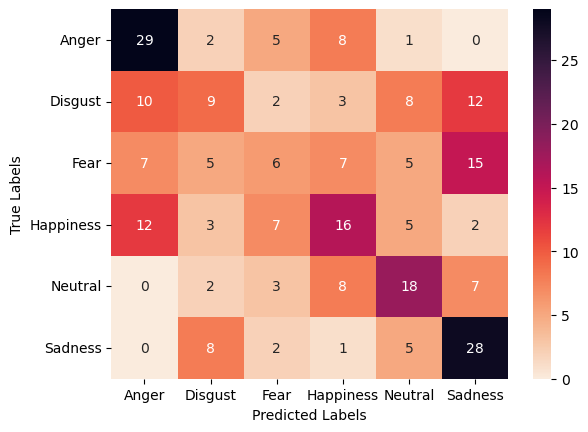

time: 281 ms (started: 2023-05-28 17:19:02 +03:00)


In [174]:
compare_performance(y_val, y_val_pred2)

**Test**

              precision    recall  f1-score   support

           0       0.59      0.69      0.64       381
           1       0.45      0.38      0.41       382
           2       0.36      0.15      0.21       381
           3       0.42      0.41      0.42       381
           4       0.40      0.50      0.44       326
           5       0.49      0.66      0.57       382

    accuracy                           0.47      2233
   macro avg       0.45      0.47      0.45      2233
weighted avg       0.45      0.47      0.45      2233



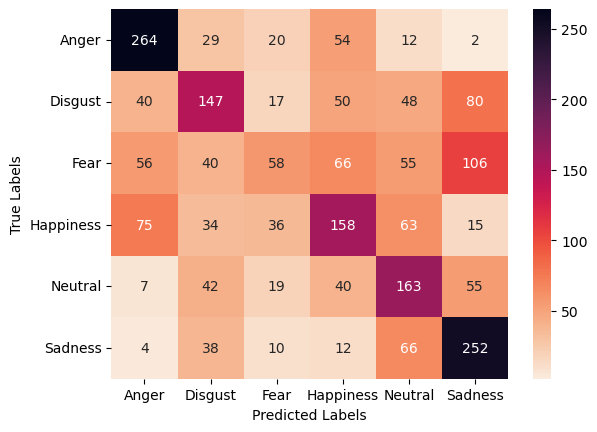

time: 297 ms (started: 2023-05-28 17:19:02 +03:00)


In [175]:
compare_performance(y_test, y_test_pred2)

### Mel Spectrogram

**_Without Augmentation_**

In [160]:
y_train_pred3 = model3.predict(X_mel_train)
y_val_pred3 = model3.predict(X_mel_val)
y_test_pred3 = model3.predict(X_mel_test)

70/70 [==============================] - 16s 223ms/step
time: 53.4 s (started: 2023-05-28 17:14:04 +03:00)


**Training**

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       845
           1       0.80      0.70      0.75       845
           2       0.78      0.71      0.75       845
           3       0.79      0.79      0.79       845
           4       0.73      0.95      0.83       723
           5       0.75      0.70      0.73       845

    accuracy                           0.78      4948
   macro avg       0.78      0.79      0.78      4948
weighted avg       0.79      0.78      0.78      4948



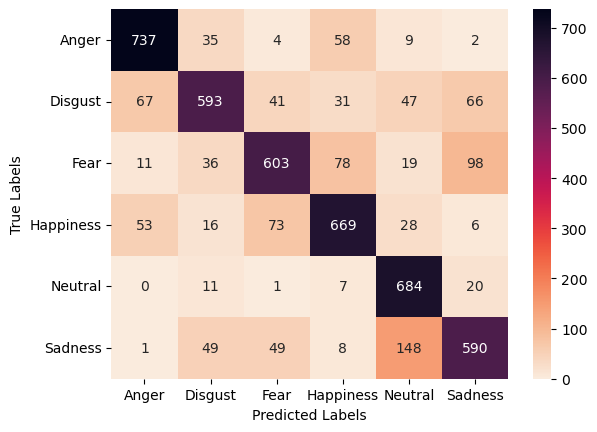

time: 375 ms (started: 2023-05-28 17:14:58 +03:00)


In [161]:
compare_performance(y_train, y_train_pred3)

**Validation**

              precision    recall  f1-score   support

           0       0.66      0.73      0.69        45
           1       0.53      0.43      0.48        44
           2       0.49      0.44      0.47        45
           3       0.57      0.51      0.54        45
           4       0.54      0.71      0.61        38
           5       0.59      0.59      0.59        44

    accuracy                           0.57       261
   macro avg       0.56      0.57      0.56       261
weighted avg       0.56      0.57      0.56       261



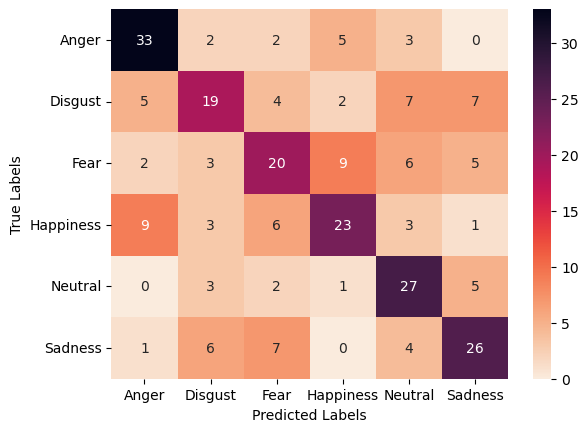

time: 344 ms (started: 2023-05-28 17:14:58 +03:00)


In [162]:
compare_performance(y_val, y_val_pred3)

**Test**

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       381
           1       0.56      0.47      0.51       382
           2       0.55      0.44      0.49       381
           3       0.56      0.59      0.57       381
           4       0.55      0.76      0.64       326
           5       0.60      0.57      0.58       382

    accuracy                           0.59      2233
   macro avg       0.59      0.60      0.59      2233
weighted avg       0.59      0.59      0.59      2233



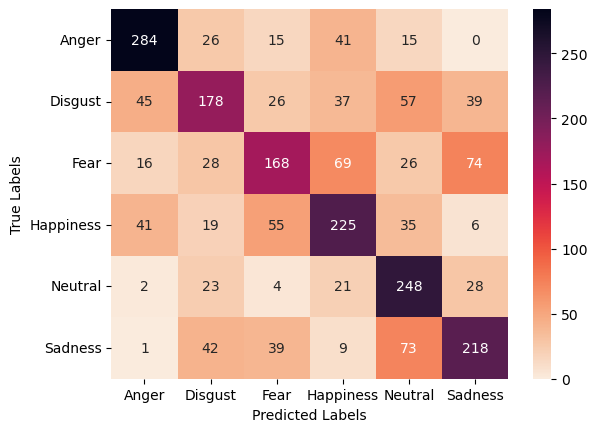

time: 312 ms (started: 2023-05-28 17:14:59 +03:00)


In [163]:
compare_performance(y_test, y_test_pred3)

**_With Augmentation_**

In [164]:
y_aug_train_pred4 = model4.predict(X_aug_mel_train)
y_val_pred4 = model4.predict(X_mel_val)
y_test_pred4 = model4.predict(X_mel_test)

70/70 [==============================] - 15s 209ms/step
time: 1min 58s (started: 2023-05-28 17:14:59 +03:00)


**Training**

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2535
           1       0.79      0.78      0.79      2535
           2       0.81      0.72      0.76      2535
           3       0.83      0.82      0.83      2535
           4       0.86      0.91      0.88      2169
           5       0.77      0.79      0.78      2535

    accuracy                           0.82     14844
   macro avg       0.82      0.82      0.82     14844
weighted avg       0.82      0.82      0.82     14844



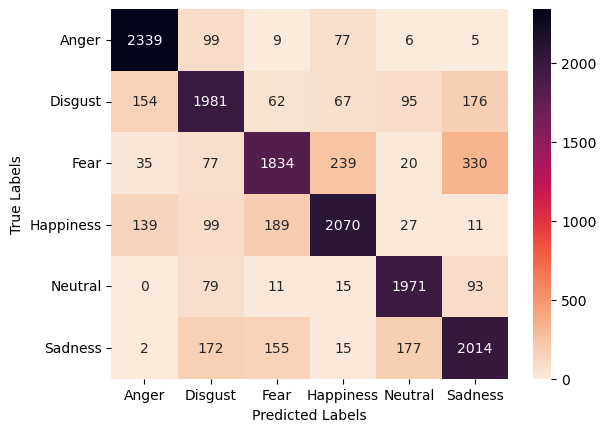

time: 313 ms (started: 2023-05-28 17:16:58 +03:00)


In [165]:
compare_performance(y_aug_train, y_aug_train_pred4)

**Validation**

              precision    recall  f1-score   support

           0       0.66      0.73      0.69        45
           1       0.46      0.41      0.43        44
           2       0.59      0.51      0.55        45
           3       0.59      0.58      0.58        45
           4       0.69      0.66      0.68        38
           5       0.58      0.70      0.64        44

    accuracy                           0.60       261
   macro avg       0.60      0.60      0.60       261
weighted avg       0.59      0.60      0.59       261



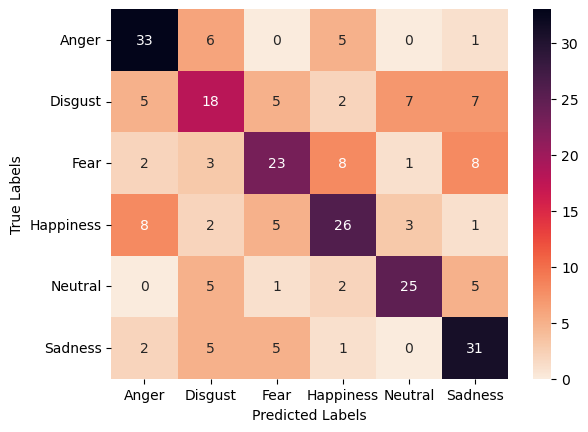

time: 3.22 s (started: 2023-05-28 17:16:58 +03:00)


In [166]:
compare_performance(y_val, y_val_pred4)

**Test**

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       381
           1       0.53      0.60      0.56       382
           2       0.56      0.49      0.52       381
           3       0.60      0.57      0.58       381
           4       0.64      0.66      0.65       326
           5       0.63      0.62      0.62       382

    accuracy                           0.62      2233
   macro avg       0.62      0.62      0.62      2233
weighted avg       0.61      0.62      0.61      2233



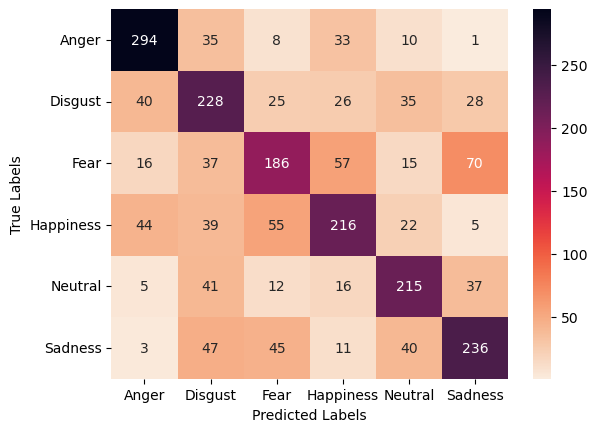

time: 281 ms (started: 2023-05-28 17:17:02 +03:00)


In [167]:
compare_performance(y_test, y_test_pred4)